In [1]:
import pandas as pd
import seaborn as sns
import scipy as sp
import math
import matplotlib.pyplot as plt
from plotly.offline import iplot
from scipy.spatial.distance import cosine
from plotly.offline import iplot
import plotly as py
import cufflinks as cf
import math 
import numpy as np
#py.offline.init_notebook_mode(connected=True) 
#cf.go_offline() 

In [2]:
df=pd.read_csv('train.csv', skipinitialspace=True)
df

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
0,Long Road,241760,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,...,0.2810,0.6350,142.221,241760,4.0,567.0,141.0,NaN,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,...,0.3600,0.0336,75.596,444000,4.0,617.0,155.0,NaN,2.367412,iranian
2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,...,0.2620,0.4890,116.628,333507,4.0,652.0,162.0,NaN,3.700483,black-metal
3,Can't Look Away,269800,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,...,0.1170,0.3850,140.880,269800,4.0,619.0,155.0,0.469,1.279305,bluegrass
4,Thunderground,307651,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,...,0.2990,0.6370,143.956,307652,4.0,733.0,183.0,NaN,4.067086,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Outpt,432026,False,0,Autechre,EP7,0.554,0.657,1,-14.232,...,0.1320,0.0335,117.319,432027,NaN,837.0,212.0,NaN,2.367412,idm
14996,Natural Environment Sounds: To Improve Sleep a...,182746,False,44,Natural White Noise Relaxation,Baby Sleep White Noise: Ultimate Album to Help...,0.103,0.860,1,-19.627,...,0.1230,0.0016,92.323,182747,3.0,277.0,92.0,NaN,2.367412,sleep
14997,Psychological Attack,400091,False,43,Droplex,Psychological Attack,0.799,0.535,1,-9.103,...,0.0713,0.0708,126.000,400091,4.0,837.0,209.0,NaN,2.367412,techno
14998,Don't Hate The 808 (feat. Lafa Taylor),197250,False,37,Bassnectar;Lafa Taylor,Noise vs Beauty,0.511,0.970,5,-2.299,...,0.4020,0.2700,160.044,197250,4.0,513.0,130.0,NaN,1.279305,breakbeat


In [3]:
df.columns

Index(['name', 'duration_ms', 'explicit', 'popularity', 'artists',
       'album_name', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'features_duration_ms', 'time_signature', 'n_beats',
       'n_bars', 'popularity_confidence', 'processing', 'genre'],
      dtype='object')

## Identifico gli outliers

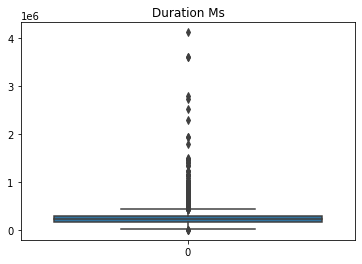

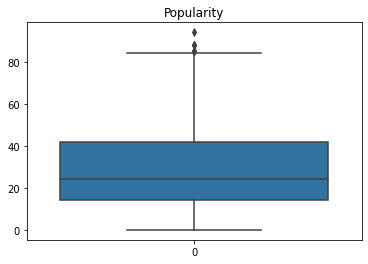

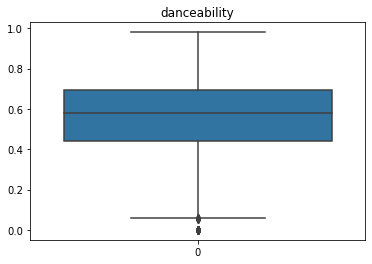

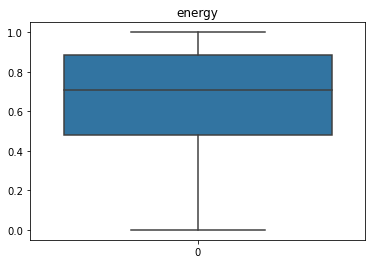

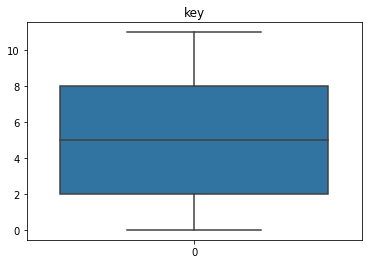

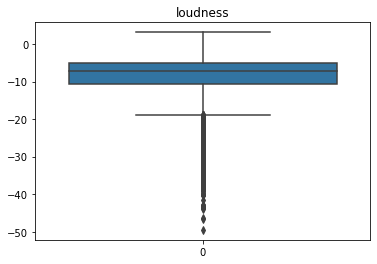

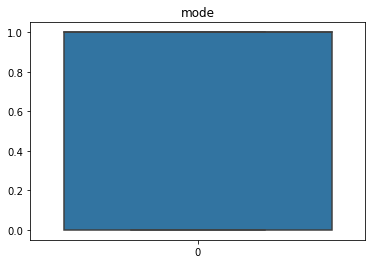

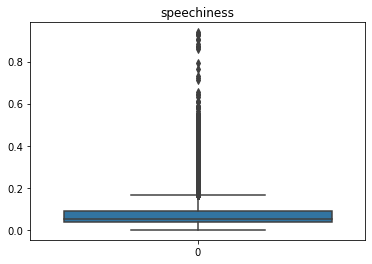

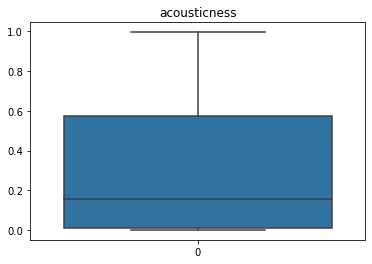

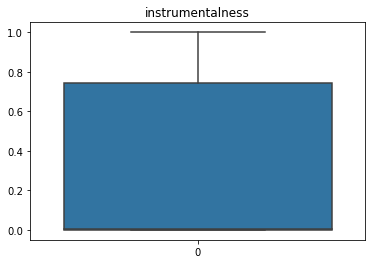

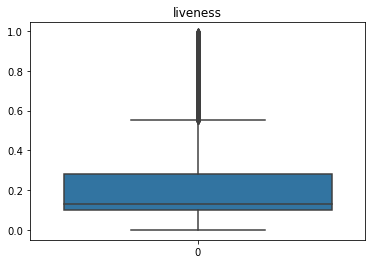

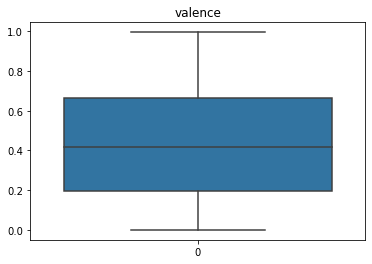

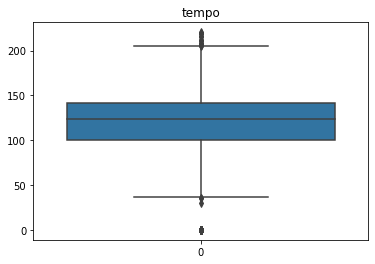

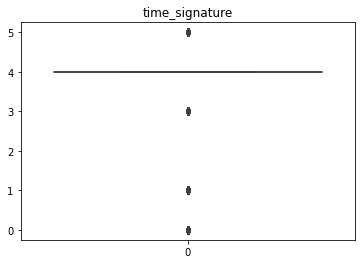

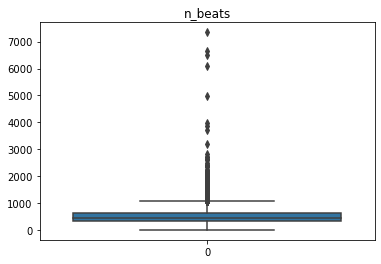

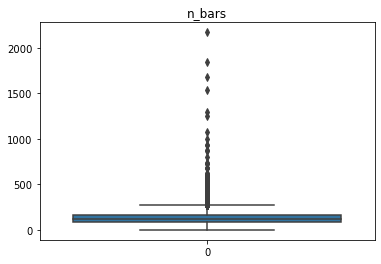

In [4]:
plt.title("Duration Ms")
sns.boxplot(df["duration_ms"])
plt.show()

plt.title("Popularity")
sns.boxplot(df["popularity"])
plt.show()

plt.title("danceability")
sns.boxplot(df["danceability"])
plt.show()

plt.title("energy")
sns.boxplot(df["energy"])
plt.show()

plt.title("key")
sns.boxplot(df["key"])
plt.show()

plt.title("loudness")
sns.boxplot(df["loudness"])
plt.show()

plt.title("mode")
sns.boxplot(df["mode"])
plt.show()

plt.title("speechiness")
sns.boxplot(df["speechiness"])
plt.show()

plt.title("acousticness")
sns.boxplot(df["acousticness"])
plt.show()

plt.title("instrumentalness")
sns.boxplot(df["instrumentalness"])
plt.show()


plt.title("liveness")
sns.boxplot(df["liveness"])
plt.show()


plt.title("valence")
sns.boxplot(df["valence"])
plt.show()

plt.title("tempo")
sns.boxplot(df["tempo"])
plt.show()


plt.title("time_signature")
sns.boxplot(df["time_signature"])
plt.show()

plt.title("n_beats")
sns.boxplot(df["n_beats"])
plt.show()

plt.title("n_bars")
sns.boxplot(df["n_bars"])
plt.show()

In [5]:
from scipy import stats

# Select only numeric columns for z-score calculation (excluding non-numeric or string columns)
numeric_columns = df.select_dtypes(include=[np.number])

z_scores = np.abs(stats.zscore(numeric_columns))
threshold = 3  # Set a threshold for z-score (usually 2 to 3)

# Find outliers using z-score
outliers = (z_scores > threshold).any(axis=1)


df_no_outliers = df[~outliers]

## Dataframe senza outliers

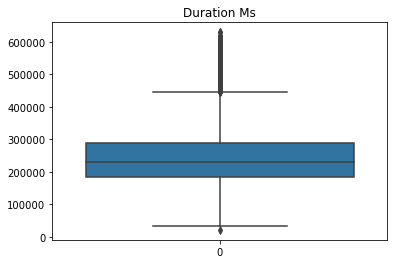

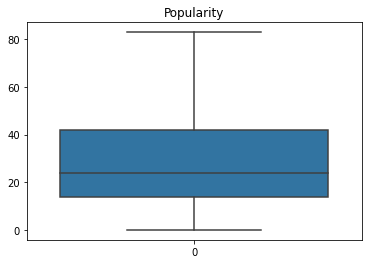

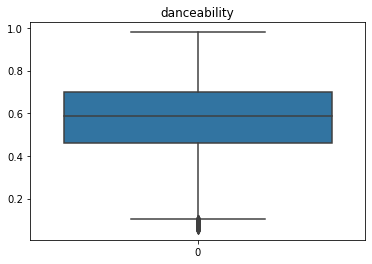

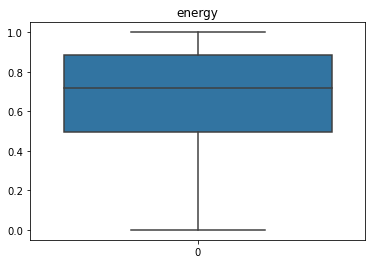

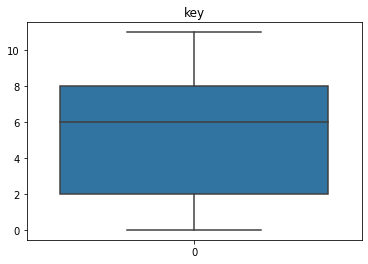

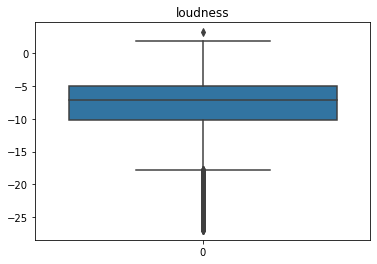

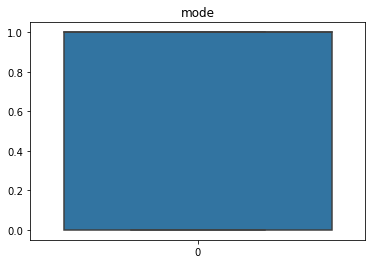

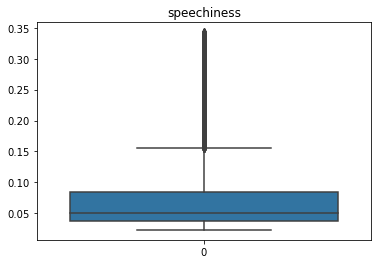

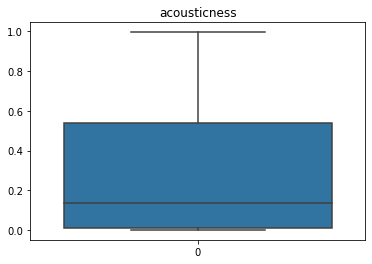

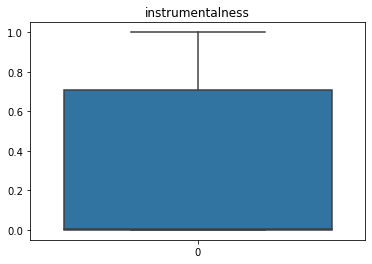

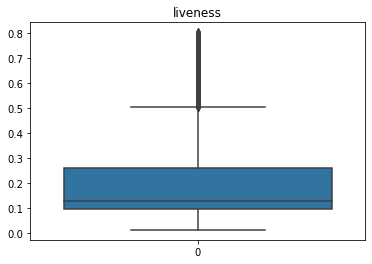

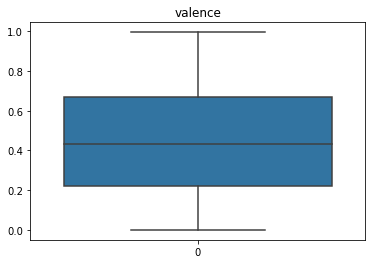

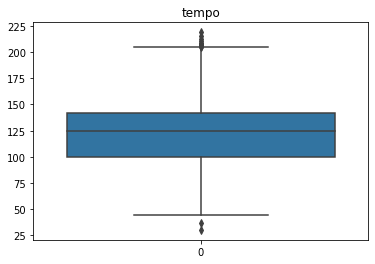

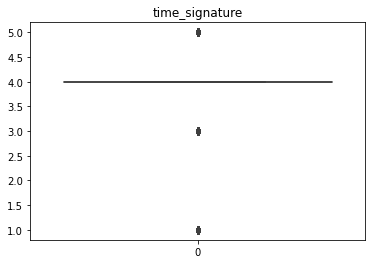

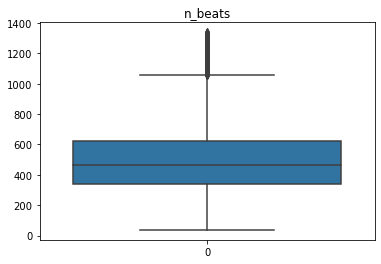

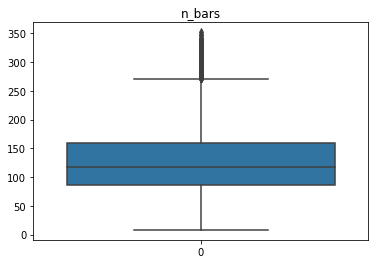

In [6]:
plt.title("Duration Ms")
sns.boxplot(df_no_outliers["duration_ms"])
plt.show()

plt.title("Popularity")
sns.boxplot(df_no_outliers["popularity"])
plt.show()

plt.title("danceability")
sns.boxplot(df_no_outliers["danceability"])
plt.show()

plt.title("energy")
sns.boxplot(df_no_outliers["energy"])
plt.show()

plt.title("key")
sns.boxplot(df_no_outliers["key"])
plt.show()

plt.title("loudness")
sns.boxplot(df_no_outliers["loudness"])
plt.show()

plt.title("mode")
sns.boxplot(df_no_outliers["mode"])
plt.show()

plt.title("speechiness")
sns.boxplot(df_no_outliers["speechiness"])
plt.show()

plt.title("acousticness")
sns.boxplot(df_no_outliers["acousticness"])
plt.show()

plt.title("instrumentalness")
sns.boxplot(df_no_outliers["instrumentalness"])
plt.show()


plt.title("liveness")
sns.boxplot(df_no_outliers["liveness"])
plt.show()


plt.title("valence")
sns.boxplot(df_no_outliers["valence"])
plt.show()

plt.title("tempo")
sns.boxplot(df_no_outliers["tempo"])
plt.show()


plt.title("time_signature")
sns.boxplot(df_no_outliers["time_signature"])
plt.show()

plt.title("n_beats")
sns.boxplot(df_no_outliers["n_beats"])
plt.show()

plt.title("n_bars")
sns.boxplot(df_no_outliers["n_bars"])
plt.show()

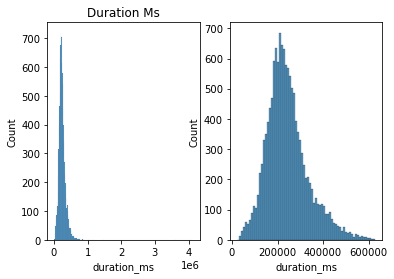

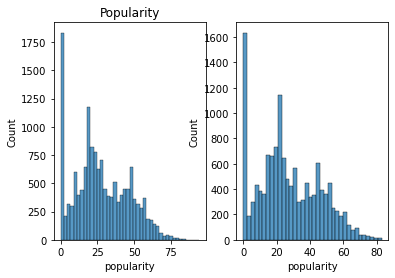

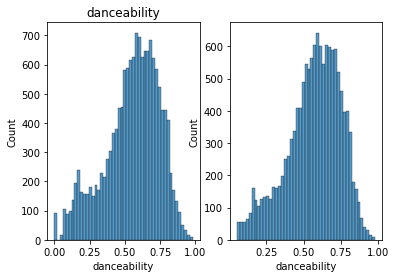

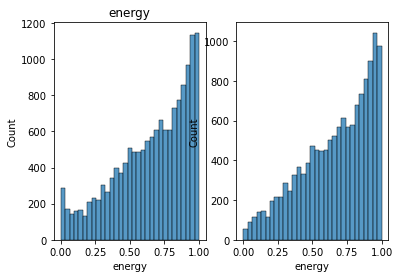

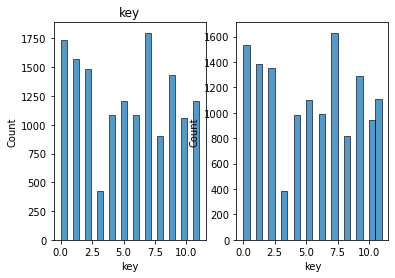

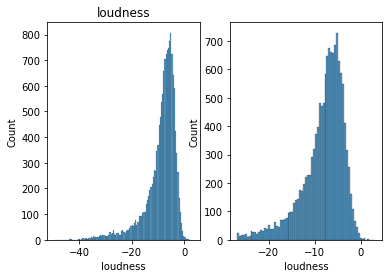

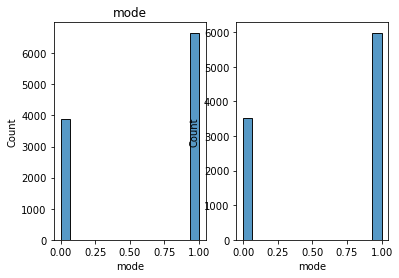

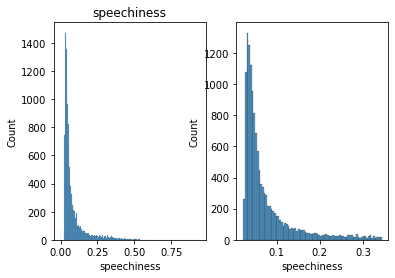

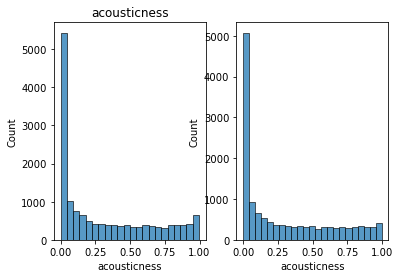

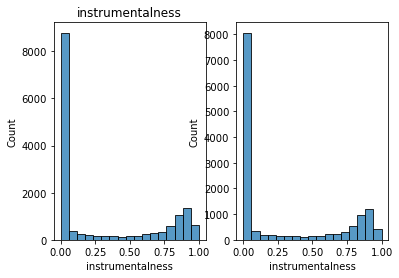

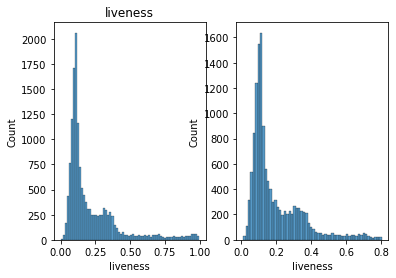

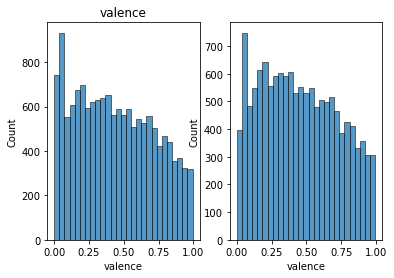

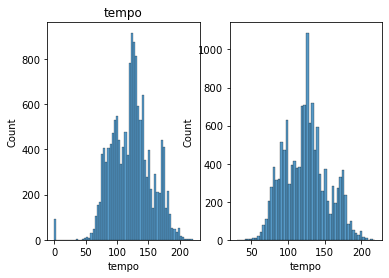

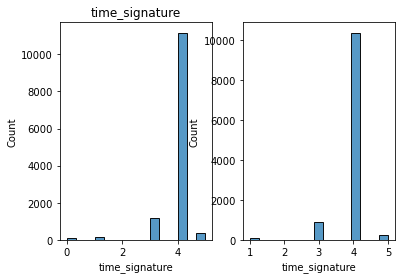

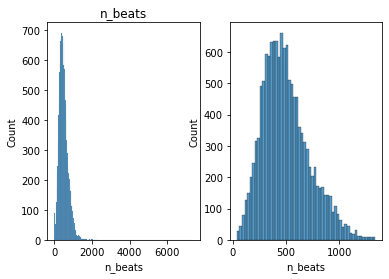

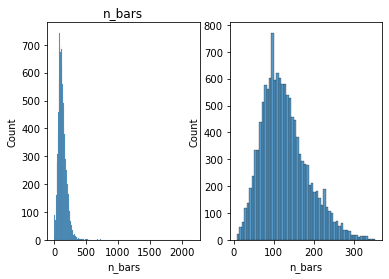

In [7]:
plt.subplot(1,2,1)
sns.histplot(df["duration_ms"])
plt.title("Duration Ms")
plt.subplot(1,2,2)
sns.histplot(df_no_outliers["duration_ms"])
plt.show()

plt.subplot(1,2,1)
sns.histplot(df["popularity"])
plt.title("Popularity")
plt.subplot(1,2,2)
sns.histplot(df_no_outliers["popularity"])
plt.show()


plt.subplot(1,2,1)
sns.histplot(df["danceability"])
plt.title("danceability")
plt.subplot(1,2,2)
sns.histplot(df_no_outliers["danceability"])
plt.show()


plt.subplot(1,2,1)
sns.histplot(df["energy"])
plt.title("energy")
plt.subplot(1,2,2)
sns.histplot(df_no_outliers["energy"])
plt.show()


plt.subplot(1,2,1)
sns.histplot(df["key"])
plt.title("key")
plt.subplot(1,2,2)
sns.histplot(df_no_outliers["key"])
plt.show()


plt.subplot(1,2,1)
sns.histplot(df["loudness"])
plt.title("loudness")
plt.subplot(1,2,2)
sns.histplot(df_no_outliers["loudness"])
plt.show()


plt.subplot(1,2,1)
sns.histplot(df["mode"])
plt.title("mode")
plt.subplot(1,2,2)
sns.histplot(df_no_outliers["mode"])
plt.show()


plt.subplot(1,2,1)
sns.histplot(df["speechiness"])
plt.title("speechiness")
plt.subplot(1,2,2)
sns.histplot(df_no_outliers["speechiness"])
plt.show()


plt.subplot(1,2,1)
sns.histplot(df["acousticness"])
plt.title("acousticness")
plt.subplot(1,2,2)
sns.histplot(df_no_outliers["acousticness"])
plt.show()


plt.subplot(1,2,1)
sns.histplot(df["instrumentalness"])
plt.title("instrumentalness")
plt.subplot(1,2,2)
sns.histplot(df_no_outliers["instrumentalness"])
plt.show()



plt.subplot(1,2,1)
sns.histplot(df["liveness"])
plt.title("liveness")
plt.subplot(1,2,2)
sns.histplot(df_no_outliers["liveness"])
plt.show()



plt.subplot(1,2,1)
sns.histplot(df["valence"])
plt.title("valence")
plt.subplot(1,2,2)
sns.histplot(df_no_outliers["valence"])
plt.show()


plt.subplot(1,2,1)
sns.histplot(df["tempo"])
plt.title("tempo")
plt.subplot(1,2,2)
sns.histplot(df_no_outliers["tempo"])
plt.show()



plt.subplot(1,2,1)
sns.histplot(df["time_signature"])
plt.title("time_signature")
plt.subplot(1,2,2)
sns.histplot(df_no_outliers["time_signature"])
plt.show()


plt.subplot(1,2,1)
sns.histplot(df["n_beats"])
plt.title("n_beats")
plt.subplot(1,2,2)
sns.histplot(df_no_outliers["n_beats"])
plt.show()

plt.subplot(1,2,1)
sns.histplot(df["n_bars"])
plt.title("n_bars")
plt.subplot(1,2,2)
sns.histplot(df_no_outliers["n_bars"])
plt.show()

## Gestione valori nulli

In [8]:
df_no_outliers.isnull().sum()

name                         0
duration_ms                  0
explicit                     0
popularity                   0
artists                      0
album_name                   0
danceability                 0
energy                       0
key                          0
loudness                     0
mode                      4013
speechiness                  0
acousticness                 0
instrumentalness             0
liveness                     0
valence                      0
tempo                        0
features_duration_ms         0
time_signature            1893
n_beats                      0
n_bars                       0
popularity_confidence    11521
processing                   0
genre                        0
dtype: int64

In [9]:
df_no_outliers             

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
0,Long Road,241760,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,...,0.2810,0.6350,142.221,241760,4.0,567.0,141.0,NaN,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,...,0.3600,0.0336,75.596,444000,4.0,617.0,155.0,NaN,2.367412,iranian
2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,...,0.2620,0.4890,116.628,333507,4.0,652.0,162.0,NaN,3.700483,black-metal
3,Can't Look Away,269800,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,...,0.1170,0.3850,140.880,269800,4.0,619.0,155.0,0.469,1.279305,bluegrass
4,Thunderground,307651,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,...,0.2990,0.6370,143.956,307652,4.0,733.0,183.0,NaN,4.067086,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Outpt,432026,False,0,Autechre,EP7,0.554,0.657,1,-14.232,...,0.1320,0.0335,117.319,432027,NaN,837.0,212.0,NaN,2.367412,idm
14996,Natural Environment Sounds: To Improve Sleep a...,182746,False,44,Natural White Noise Relaxation,Baby Sleep White Noise: Ultimate Album to Help...,0.103,0.860,1,-19.627,...,0.1230,0.0016,92.323,182747,3.0,277.0,92.0,NaN,2.367412,sleep
14997,Psychological Attack,400091,False,43,Droplex,Psychological Attack,0.799,0.535,1,-9.103,...,0.0713,0.0708,126.000,400091,4.0,837.0,209.0,NaN,2.367412,techno
14998,Don't Hate The 808 (feat. Lafa Taylor),197250,False,37,Bassnectar;Lafa Taylor,Noise vs Beauty,0.511,0.970,5,-2.299,...,0.4020,0.2700,160.044,197250,4.0,513.0,130.0,NaN,1.279305,breakbeat


In [10]:
modamode = df_no_outliers["mode"].mode()[0]


df_no_outliers["mode"] = df_no_outliers["mode"].fillna(modamode)

df_no_outliers.isnull().sum()

name                         0
duration_ms                  0
explicit                     0
popularity                   0
artists                      0
album_name                   0
danceability                 0
energy                       0
key                          0
loudness                     0
mode                         0
speechiness                  0
acousticness                 0
instrumentalness             0
liveness                     0
valence                      0
tempo                        0
features_duration_ms         0
time_signature            1893
n_beats                      0
n_bars                       0
popularity_confidence    11521
processing                   0
genre                        0
dtype: int64

In [11]:
mediantime = df_no_outliers["time_signature"].median()


df_no_outliers["time_signature"] = df_no_outliers["time_signature"].fillna(mediantime)

df_no_outliers.isnull().sum()

name                         0
duration_ms                  0
explicit                     0
popularity                   0
artists                      0
album_name                   0
danceability                 0
energy                       0
key                          0
loudness                     0
mode                         0
speechiness                  0
acousticness                 0
instrumentalness             0
liveness                     0
valence                      0
tempo                        0
features_duration_ms         0
time_signature               0
n_beats                      0
n_bars                       0
popularity_confidence    11521
processing                   0
genre                        0
dtype: int64

In [12]:
df_no_outliers.drop(columns=['popularity_confidence'], inplace=True)
df_no_outliers.isnull().sum()

name                    0
duration_ms             0
explicit                0
popularity              0
artists                 0
album_name              0
danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
features_duration_ms    0
time_signature          0
n_beats                 0
n_bars                  0
processing              0
genre                   0
dtype: int64